In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications import *
from keras.callbacks import ReduceLROnPlateau


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

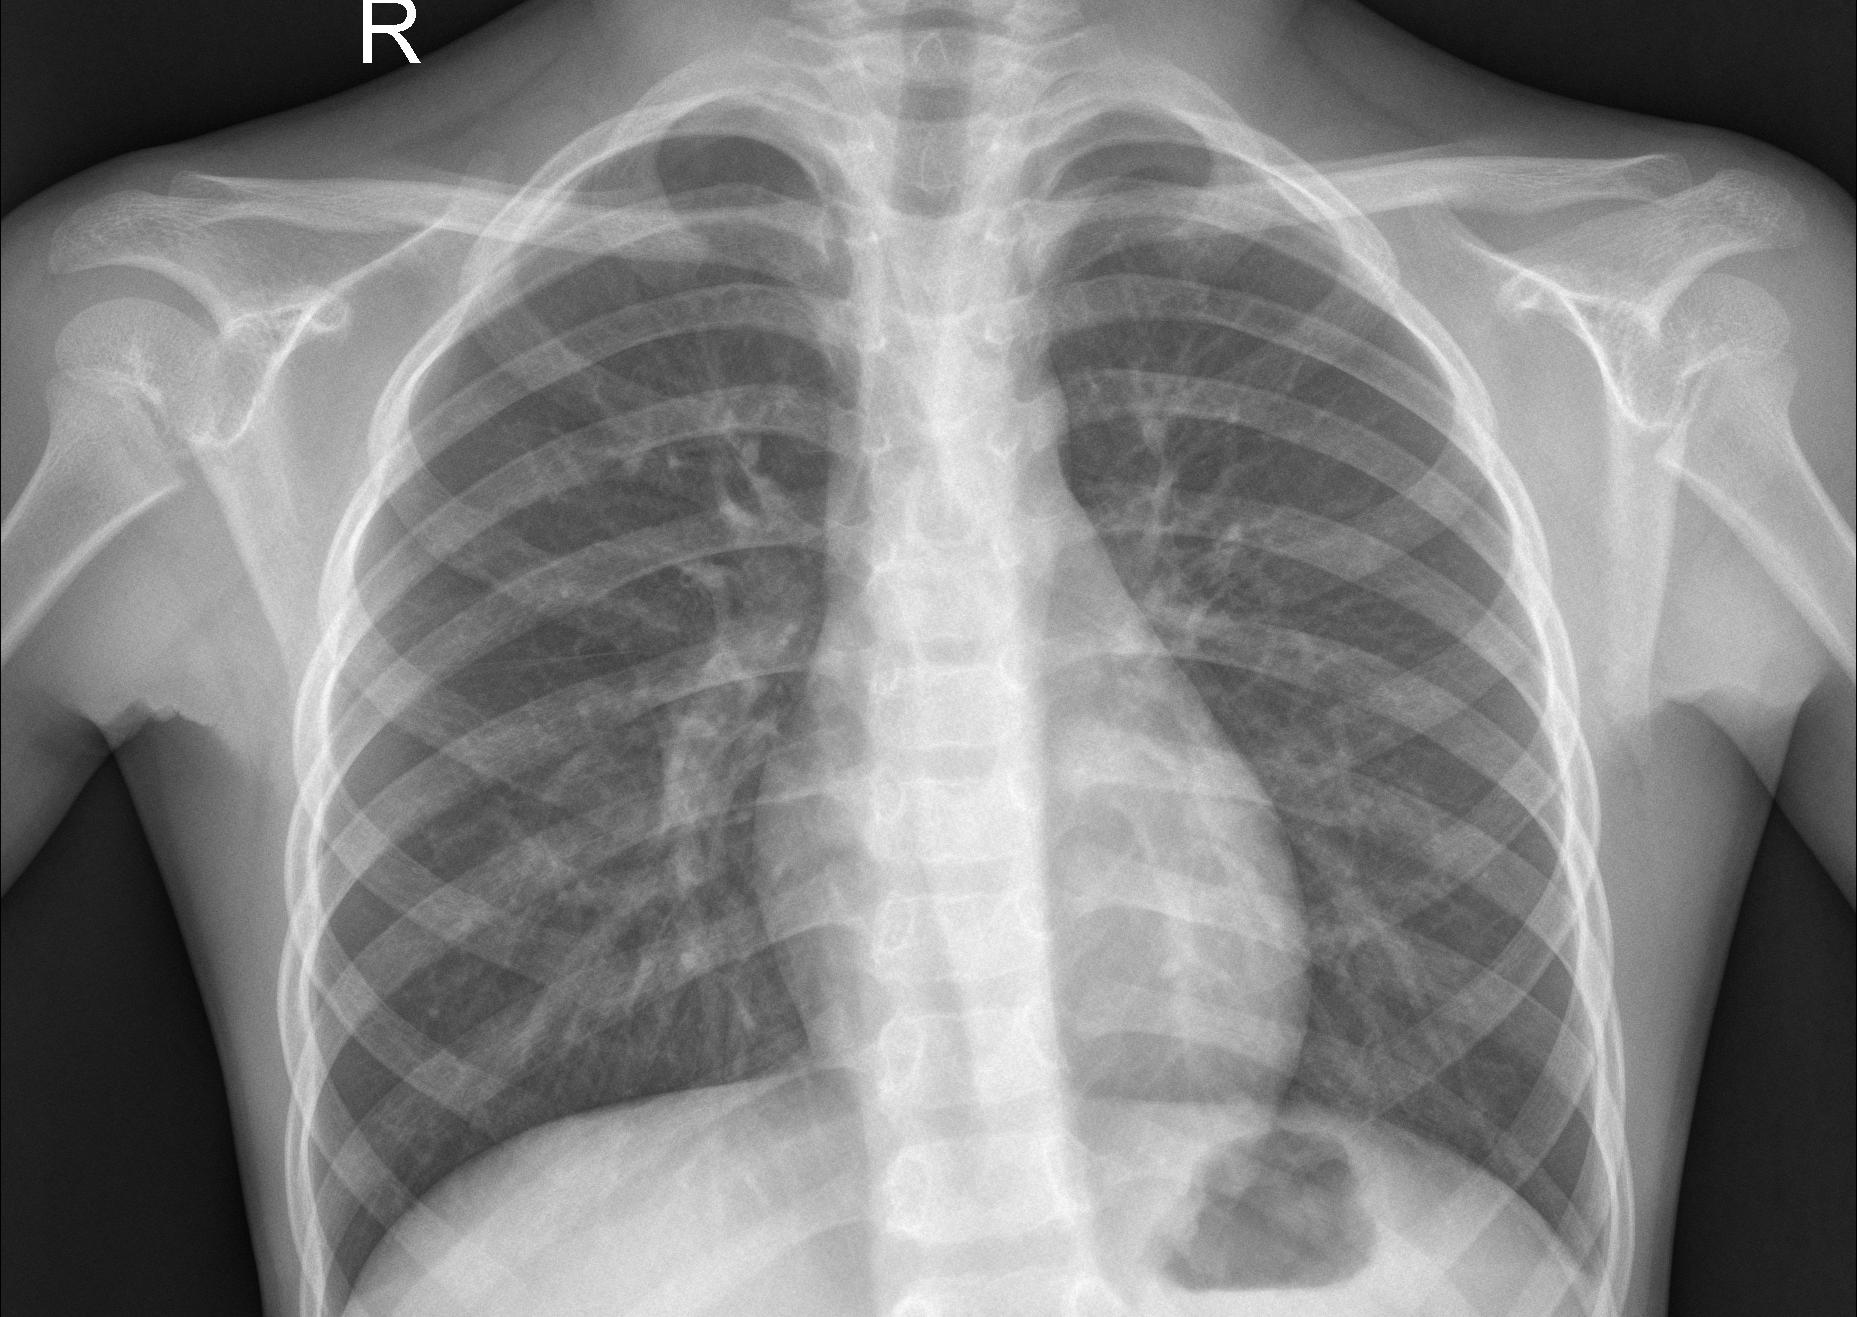

In [2]:
img = image.load_img("../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg")
img

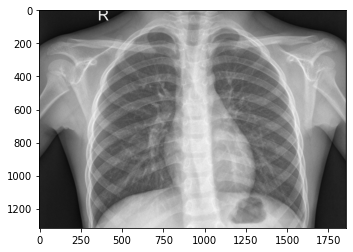

In [3]:
plt.imshow(img)


In [4]:

import cv2
img_num = cv2.imread("../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg")
img_num.shape

(1317, 1857, 3)

In [5]:
img_num

array([[[ 0,  0,  0],
        [32, 32, 32],
        [33, 33, 33],
        ...,
        [33, 33, 33],
        [34, 34, 34],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [33, 33, 33],
        [33, 33, 33],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [ 0,  0,  0]],

       [[ 1,  1,  1],
        [33, 33, 33],
        [33, 33, 33],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [34, 34, 34],
        [35, 35, 35],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [34, 34, 34],
        [35, 35, 35],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [ 0,  0,  0]]], dtype=uint8)

In [6]:
### train = ImageDataGenerator(rescale = 1/255)
train = ImageDataGenerator(rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images



valid = ImageDataGenerator(rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images 





In [7]:
train_dataset = train.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/train/',
        target_size=(224, 224),  
        class_mode='binary')
validation_dataset = valid.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/val/',
        target_size=(224, 224),
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [8]:
train_dataset.class_indices
img_size = 500

#    **load pre-trained EfficientNetB6 baseline model with the imagNet Dataset **

In [11]:

conv_base = EfficientNetB6(input_shape=(img_size,img_size,3),include_top=False,weights="imagenet")


165240832/165234480 [==============================] - 1s 0us/step


# # **base-line Model**

In [14]:
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(1, activation='sigmoid'))


cnn4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 220, 220, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)     

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.000001)
cnn4.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])




In [16]:
history = cnn4.fit(train_dataset, validation_data=validation_dataset, epochs = 15, callbacks = [learning_rate_reduction])
history

Epoch 1/15
163/163 [==============================] - 112s 685ms/step - loss: 0.5240 - accuracy: 0.8076 - val_loss: 4.0623 - val_accuracy: 0.5000
Epoch 3/15
163/163 [==============================] - 113s 691ms/step - loss: 0.4629 - accuracy: 0.8345 - val_loss: 1.9002 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1e-06.
Epoch 4/15
163/163 [==============================] - 112s 687ms/step - loss: 0.4279 - accuracy: 0.8497 - val_loss: 0.9729 - val_accuracy: 0.6875
Epoch 6/15
163/163 [==============================] - 113s 693ms/step - loss: 0.4232 - accuracy: 0.8485 - val_loss: 0.9745 - val_accuracy: 0.6250
Epoch 7/15
163/163 [==============================] - 112s 687ms/step - loss: 0.4095 - accuracy: 0.8666 - val_loss: 1.6386 - val_accuracy: 0.4375
Epoch 8/15
163/163 [==============================] - 111s 684ms/step - loss: 0.4302 - accuracy: 0.8490 - val_loss: 1.2653 - val_accuracy: 0.5625
Epoch 9/15
163/163 [==============================] - 113s 

In [17]:
test_dataset = valid.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/test/',
        target_size=(224, 224),
        class_mode='binary')

Found 624 images belonging to 2 classes.


In [18]:
print("Evaluate on test data")
results = cnn4.evaluate(test_dataset)
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")


Evaluate on test data
20/20 [==============================] - 13s 644ms/step - loss: 0.9333 - accuracy: 0.6891
test loss, test acc: [0.933254063129425, 0.6891025900840759]
Accuracy of the model is -  68.91025900840759 %


# # **VGG16 Model**

In [31]:
# Create the base model of VGG19
vgg16 = VGG16( include_top=False, input_shape = (224, 224, 3))


In [32]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

###### 

In [33]:
model = Sequential()

for layer in vgg16.layers[:-1]: # this is where I changed your code
    model.add(layer)    
# Freeze the layers 
for layer in model.layers:
    layer.trainable = False


In [34]:
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


In [35]:

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [38]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])


In [39]:
history = model.fit(train_dataset, validation_data=validation_dataset, epochs = 15)
history

Epoch 1/15
163/163 [==============================] - 171s 991ms/step - loss: 0.4948 - accuracy: 0.7501 - val_loss: 0.7511 - val_accuracy: 0.6250
Epoch 2/15
163/163 [==============================] - 109s 668ms/step - loss: 0.3367 - accuracy: 0.8556 - val_loss: 0.7235 - val_accuracy: 0.6250
Epoch 3/15
163/163 [==============================] - 109s 668ms/step - loss: 0.2755 - accuracy: 0.8996 - val_loss: 0.7673 - val_accuracy: 0.6250
Epoch 4/15
163/163 [==============================] - 109s 667ms/step - loss: 0.2340 - accuracy: 0.9186 - val_loss: 0.8077 - val_accuracy: 0.6250
Epoch 5/15
163/163 [==============================] - 109s 669ms/step - loss: 0.2311 - accuracy: 0.9203 - val_loss: 0.6570 - val_accuracy: 0.6250
Epoch 6/15
163/163 [==============================] - 108s 665ms/step - loss: 0.2201 - accuracy: 0.9236 - val_loss: 0.8280 - val_accuracy: 0.6250
Epoch 7/15
163/163 [==============================] - 107s 659ms/step - loss: 0.1905 - accuracy: 0.9335 - val_loss: 0.7563 -

In [40]:
test_dataset = valid.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/test/',
        target_size=(224, 224),
        class_mode='binary')

Found 624 images belonging to 2 classes.


In [42]:
print("Evaluate on test data")
results = model.evaluate(test_dataset)
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")


Evaluate on test data
20/20 [==============================] - 15s 782ms/step - loss: 0.3955 - accuracy: 0.8301
test loss, test acc: [0.39548444747924805, 0.8301281929016113]
Accuracy of the model is -  83.01281929016113 %


In [28]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.000001)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6)

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=False, name="SGD")
model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])


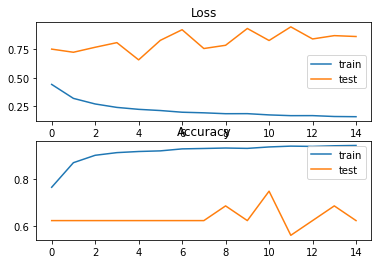

In [43]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()